### The Sparks Foundation
 Data science and Business analytics internship task 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## IMPORTING THE DATASET

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

## VISUALIZING THE DATA

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


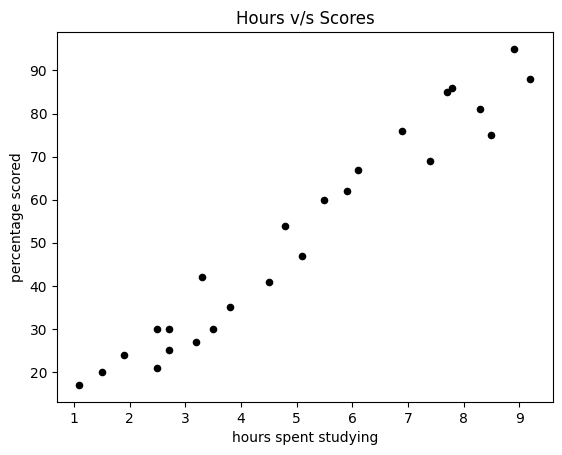

In [7]:
df.plot(kind='scatter',
        x='Hours',
        y='Scores',
        color='black')
plt.title('Hours v/s Scores')
plt.xlabel('hours spent studying')
plt.ylabel('percentage scored')
plt.show()

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## DATA PREPARATION

In [15]:
X = df.iloc[:,0:1].values
Y = df.iloc[:,1:].values

In [11]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [16]:
print(Y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [17]:
# split the data into training and testing data in the ratio of 4:1
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


## TRAINING THE MODEL

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

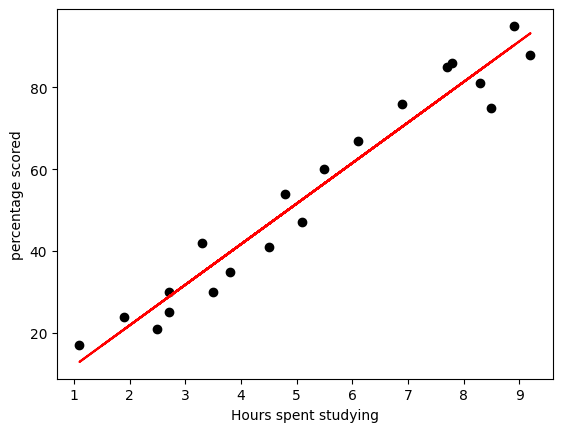

In [22]:
#let's see the predicted line (regression line) on the training data
# y = m*x + c
regline = model.coef_*X + model.intercept_
plt.scatter(X_train,Y_train,color='black')
plt.plot(X, regline, color='red')
plt.xlabel('Hours spent studying')
plt.ylabel('percentage scored')
plt.show()

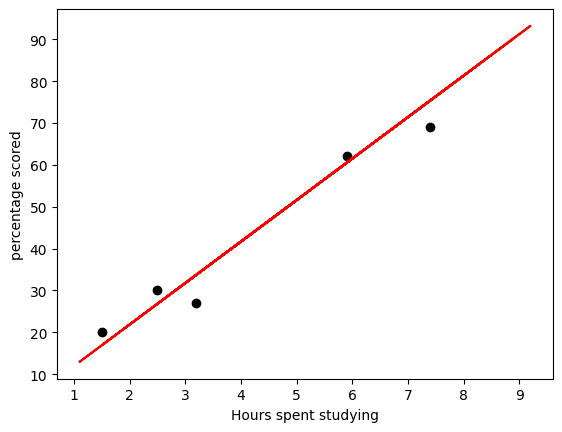

In [23]:
#ploting this line and scattering the test data
plt.scatter(X_test,Y_test,color='black')
plt.plot(X, regline, color='red')
plt.xlabel('Hours spent studying')
plt.ylabel('percentage scored')
plt.show()

## MAKING PREDICTION ON TEST DATA

In [24]:
#making prediction on test data
y_pred=model.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [26]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [33]:
#lets predict for 9.25 hours
hour=9.25
ans_pred=model.predict([[hour]])
ans_pred

array([[93.69173249]])

In [34]:
print("the predicted score of a student if he studies for 9.25 hours is ", ans_pred)

the predicted score of a student if he studies for 9.25 hours is  [[93.69173249]]


## EVALUATING THE MODEL


In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,Y_test)

21.598769307217456